In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
data = data.drop(['id','qid1','qid2'],axis=1)

In [ ]:
data

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


# Feature Extraction:
1) Extracting basic features:

length based features

In [ ]:
data['len_q1'] = data.question1.apply(lambda x: len(str(x)))
data['len_q2'] = data.question2.apply(lambda x: len(str(x)))
data['diff_len'] = data.len_q1 - data.len_q2

Character length based features

In [ ]:
data['len_char_q1'] = data.question1.apply(lambda x: len(''.join(set(str(x).replace( ' ', '')))))
data['len_char_q2'] = data.question2.apply(lambda x: len(''.join(set(str(x).replace( ' ', '')))))

Number of words in Q1 and Q2

In [ ]:
data['len_word_q1'] = data.question1.apply(lambda x: len(str(x).split()))
data['len_word_q2'] = data.question2.apply(lambda x: len(str(x).split()))

number of common words

In [ ]:
data['common_words'] = data.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)

Storing list of basic features as fs_1:

In [ ]:
fs_1 = ['len_q1', 'len_q2', 'diff_len', 'len_char_q1', 'len_char_q2', 'len_word_q1', 'len_word_q2','common_words']

2) Extracting Advanced features\
These are called fuzzy features:
Fuzzywuzzy module is required and provides easy implementation

In [ ]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.7 MB/s eta 0:00:00


In [ ]:
from fuzzywuzzy import fuzz

In [ ]:
data['fuzz_qratio'] = data.apply(lambda x: fuzz.QRatio(str(x['question1']),str(x['question2'])), axis = 1)

data['fuzz_WRatio'] = data.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)

data['fuzz_partial_ratio'] = data.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)

data['fuzz_partial_token_set_ratio'] = data.apply(lambda x:
fuzz.partial_token_set_ratio(str(x['question1']),
str(x['question2'])), axis=1)

data['fuzz_partial_token_sort_ratio'] = data.apply(lambda x:
fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)

data['fuzz_token_set_ratio'] = data.apply(lambda x:
fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)

data['fuzz_token_sort_ratio'] = data.apply(lambda x:
fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)

Storing list of advanced features as fs_2:

In [ ]:
fs_2 = ['fuzz_qratio', 'fuzz_WRatio', 'fuzz_partial_ratio',
'fuzz_partial_token_set_ratio', 'fuzz_partial_token_sort_ratio','fuzz_token_set_ratio', 'fuzz_token_sort_ratio']

Creating extra Features using TD-IDF and SVD matrices:\
The sklearn API offers an easy implementation of TFIDF vectors and SVD matrices

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv_q1 = TfidfVectorizer(min_df=3,
max_features=None,
strip_accents='unicode',
analyzer='word',
token_pattern=r'w{1,}',
ngram_range=(1, 2),
use_idf=1,
smooth_idf=1,
sublinear_tf=1,
stop_words='english')

tfv_q2 = TfidfVectorizer(min_df=3,
max_features=None,
strip_accents='unicode',
analyzer='word',
token_pattern=r'w{1,}',
ngram_range=(1, 2),
use_idf=1,
smooth_idf=1,
sublinear_tf=1,
stop_words='english')

q1_tfidf = tfv_q1.fit_transform(data.question1.fillna(""))
q2_tfidf = tfv_q2.fit_transform(data.question2.fillna(""))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['w'] not in stop_words.
  warnings.warn(


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_q1 = TruncatedSVD(n_components=9)
svd_q2 = TruncatedSVD(n_components=9)

question1_vectors = svd_q1.fit_transform(q1_tfidf)
question2_vectors = svd_q2.fit_transform(q2_tfidf)

Feature set 3, fs_3 , is a horizontally stacked matrix.\
This matrix comprises of TF-IDF matrices for Q1 and Q2 individually , SVD matrices computed on each TF-IDF matrix individually , and then horizontally stacked to form fs_3

In [ ]:
fs_3 = np.hstack((question1_vectors, question2_vectors))

In [ ]:

import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def sent2vec(s, model):
    M = []
    words = word_tokenize(str(s).lower())
    for word in words:
        if word not in stop_words:
            if word.isalpha():
                if word in model:
                    M.append(model[word])

    M = np.array(M)
    if len(M) > 0:
        v = M.sum(axis=0)
        return v / np.sqrt((v ** 2).sum())
    else:
        return np.zeros(300)

In [ ]:
w2v_q1 = np.array([sent2vec(q, model) for q in data.question1])
w2v_q2 = np.array([sent2vec(q, model) for q in data.question2])

In [ ]:
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis

data['cosine_distance'] = [cosine(x,y)
for (x,y) in zip(w2v_q1, w2v_q2)]
data['cityblock_distance'] = [cityblock(x,y)
for (x,y) in zip(w2v_q1, w2v_q2)]
data['jaccard_distance'] = [jaccard(x,y)
for (x,y) in zip(w2v_q1, w2v_q2)]
data['canberra_distance'] = [canberra(x,y)
for (x,y) in zip(w2v_q1, w2v_q2)]
data['euclidean_distance'] = [euclidean(x,y)
for (x,y) in zip(w2v_q1, w2v_q2)]
data['minkowski_distance'] = [minkowski(x,y,3)
for (x,y) in zip(w2v_q1, w2v_q2)]
data['braycurtis_distance'] = [braycurtis(x,y)
for (x,y) in zip(w2v_q1, w2v_q2)]

/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:1157: RuntimeWarning: invalid value encountered in double_scalars
  return l1_diff.sum() / l1_sum.sum()


In [ ]:
fs_4 = ['cosine_distance', 'cityblock_distance',
         'jaccard_distance', 'canberra_distance',
         'euclidean_distance', 'minkowski_distance',
         'braycurtis_distance']

In [ ]:
# fs_5 = np.hstack((w2v_q1, w2v_q2))

# Testing , Training and Evaluation:

Training and Testing:\
1.1) Logistic regression model with 3 feature sets\
2.1) XGBoost model with 3 feature sets\

Evaluation:\
1.2) Logistric regression\
2.2) XGBoost model

End of Project

\
\
\
Finding ratio of duplicate to non duplicate values in order to dertermine which evaluation metric is best.

In [ ]:
dup_list = data['is_duplicate'].to_list()
total_count = len(dup_list)
print(dup_list)
is_dup_count = 0
is_not_dup_count = 0
for val in dup_list:
  if val == 1:
    is_dup_count += 1
  else:
    is_not_dup_count += 1

print(is_dup_count / total_count)
print(is_not_dup_count / total_count)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 

We see that the data is unbalanced , hence a metric like accuracy can be misleading. Thus , i have chosen to use recall , precision and f1-score

In [ ]:
# import gc
# import psutil
# del([tfv_q1, tfv_q2, question1_vectors, question2_vectors, svd_q1, svd_q2 ,q1_tfidf, q2_tfidf])
# del([w2v_q1, w2v_q2])
# del([model])
# gc.collect()
# psutil.virtual_memory()

# 1) Training and Testing Logistic Regression with fs_1 ,fs_2 and fs_2.
Again SciKit learn provides simple implemenation\
The model uses a 'sag' solver. which requires a linear computational time in respect to the size of the data. \
Hence, we will start by standardizing the data using the scaler function in scikit-learn:

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y = data.is_duplicate.values
y = y.astype('float32').reshape(-1, 1)

X = data[fs_1+fs_2+fs_4]
X = X.replace([np.inf, -np.inf], np.nan).fillna(0).values
X = scaler.fit_transform(X)
X = np.hstack((X, fs_3))

Randomly splitting data into percentage of 75% - 25% , training :testing

In [ ]:
np.random.seed(42)

n_all, _ = y.shape
idx = np.arange(n_all)
np.random.shuffle(idx)

n_split = n_all // 4

idx_test = idx[:n_split]
idx_train = idx[n_split:]

x_train = X[idx_train]
y_train = np.ravel(y[idx_train])

x_test = X[idx_test]
y_test = np.ravel(y[idx_test])

In [ ]:
print(x_train)
print(x_test)

[[ 1.21785399e+00 -7.41451879e-01  1.89063670e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.52515770e-01 -6.22605838e-02 -5.35159354e-01 ... -3.07188886e-06
   1.81616072e-06 -2.82549858e-07]
 [-1.32050497e+00 -1.03675244e+00 -1.35977725e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.82867487e-01 -4.16621260e-01  7.85210652e-01 ... -3.07188886e-06
   1.81616072e-06 -2.82549858e-07]
 [-4.18719551e-01 -5.34741485e-01  1.71085068e-01 ... -3.07188886e-06
   1.81616072e-06 -2.82549858e-07]
 [ 5.83264247e-01 -2.68970978e-01  8.15916931e-01 ...  4.22557120e-07
   1.24710272e-06  8.41197778e-07]]
[[-8.52912530e-01 -7.70981936e-01  1.75536715e-02 ... -3.07188886e-06
   1.81616072e-06 -2.82549858e-07]
 [-2.18322791e-01 -2.68970978e-01  7.89662299e-02 ... -3.07188886e-06
   1.81616072e-06 -2.82549858e-07]
 [ 1.21785399e+00 -4.46151316e-01  1.58357391e+00 ... -3.07188886e-06
   1.81616072e-06 -2.82549858e-07]
 ...
 [-1.79260318e-02  2.09343353e+00 -2.1932984

Using logistic regression :\
Logistic regression is a linear model for classification. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. The logistic function is a sigmoid function, which takes any real input and outputs a value between 0 and 1, and hence is ideal for classification.\
setting regularization L2 paramter to 0.1. This is a value which combats overfitting of the data model.\
Once the model is ready, we test its efficacy on the validation set (x_test for the training matrix, y_test for the correct answers). The results are assessed on accuracy, that is the proportion of exact guesses on the validation set:


In [ ]:
logres = linear_model.LogisticRegression(C=0.1,
                                 solver='sag', max_iter=1000)
logres.fit(x_train, y_train)
lr_preds = logres.predict(x_test)

#  Training and Testing XGBoost model with fs_1 , fs_2 and fs_3

In [ ]:
import xgboost as xgb

params = {"objective": "binary:logistic", "tree_method": "gpu_hist",'eval_metric':['logloss', 'error'],'eta':0.02,'depth':4}
d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)
watchlist = [(d_train, 'train'), (d_test, 'test')]
bst = xgb.train(params, d_train, 5000, watchlist, early_stopping_rounds=50, verbose_eval=100)
xgb_preds = (bst.predict(d_test) >= 0.5).astype(int)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[13:03:05] WARNING: ../src/learner.cc:767: 
Parameters: { "depth" } are not used.

[0]	train-logloss:0.68725	train-error:0.29010	test-logloss:0.68729	test-error:0.29111
[100]	train-logloss:0.50496	train-error:0.27590	test-logloss:0.50844	test-error:0.27820
[200]	train-logloss:0.48219	train-error:0.26854	test-logloss:0.48715	test-error:0.27068
[300]	train-logloss:0.47400	train-error:0.26153	test-logloss:0.48002	test-error:0.26460
[400]	train-logloss:0.46683	train-error:0.25643	test-logloss:0.47413	test-error:0.26058
[500]	train-logloss:0.46175	train-error:0.25267	test-logloss:0.47020	test-error:0.25782
[600]	train-logloss:0.45743	train-error:0.24929	test-logloss:0.46713	test-error:0.25540
[700]	train-logloss:0.45434	train-error:0.24678	test-logloss:0.46507	test-error:0.25352
[800]	train-logloss:0.45118	train-error:0.24446	test-logloss:0.46307	test-error:0.25171
[900]	train-logloss:0.44855	train-error:0.24230	test-logloss:0.46153	test-error:0.25009
[1000]	train-logloss:0.44591	train-erro

# Evaluation of Logistic regression model with fs_1 , fs_2 and fs_3:

finding y_true values, which are the actual is duplicate values of the testing set

In [ ]:
y_true = [round(float(num)) for num in y_test]
print(y_true)

[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 

converting the predicted values from logistic regression model into a list so that evaluation can be done

In [ ]:
lr_y_preds = [round(float(num)) for num in lr_preds]
print(lr_y_preds)

[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 

Method to find TP, TN, FP ,FN individually:

In [ ]:
def perf_measure(y_actual, y_hat):
    global TP
    global FP
    global TN
    global FN
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

Logistic Regression Evaluation results : 

Accuracy - 0.67
Recall score - 0.56
Specificity - 0.74
Precision score - 0.56
f1_score - 0.56
True Positive Rate  - 0.21
True Negative Rate  - 0.47
False Positive Rate  - 0.16
False Negative Rate  - 0.16 




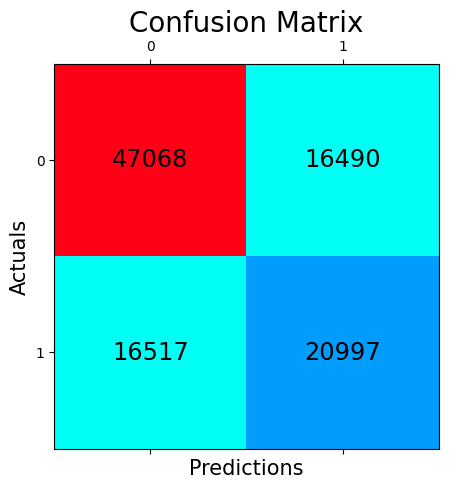

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colormaps

perf_measure(y_true,lr_y_preds)

lr_conf_matrix = confusion_matrix(y_test,lr_y_preds)

# hsv_modified = cm.get_cmap('hsv', 256) //// old version
hsv_modified=colormaps.get_cmap('hsv')

color_lr = ListedColormap(hsv_modified(np.linspace(0.5, 1, 256)))

fig1, ax1 = plt.subplots(figsize=(5,5))

ax1.matshow(lr_conf_matrix, cmap=color_lr, alpha=1)

for i in range(lr_conf_matrix.shape[0]):
    for j in range(lr_conf_matrix.shape[1]):
        ax1.text(x=j, y=i,s=lr_conf_matrix[i, j], va='center', ha='center', size='xx-large')


lr_accuracy = f"{(accuracy_score(y_true,lr_y_preds)):.2f}"
lr_recall = f"{(recall_score(y_true,lr_y_preds,pos_label=1)):.2f}"
lr_Specificity = f"{(recall_score(y_true,lr_y_preds,pos_label=0)):.2f}"
lr_Precision_score = f"{(precision_score(y_true,lr_y_preds)):.2f}"
lr_f1_score = f"{(f1_score(y_true,lr_y_preds)):.2f}"
lr_TP = f"{(TP / len(y_true)):.2f}"
lr_TN = f"{(TN / len(y_true)):.2f}"
lr_FP = f"{(FP / len(y_true)):.2f}"
lr_FN = f"{(FN / len(y_true)):.2f}"

print("Logistic Regression Evaluation results : \n")
print(f"Accuracy - {lr_accuracy}")
print(f"Recall score - {lr_recall}")
print(f"Specificity - {lr_Specificity}")
print(f"Precision score - {lr_Precision_score}" )
print(f"f1_score - {lr_f1_score}")
print(f"True Positive Rate  - {lr_TP}")
print(f"True Negative Rate  - {lr_TN}")
print(f"False Positive Rate  - {lr_FP}")
print(f"False Negative Rate  - {lr_FN} \n\n")

plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

confusion matrix for visualisation of Logistic regression results

In [ ]:
print(f"recall score - {(recall_score(y_true,lr_y_preds)):.2f}")
print(f"recall score - {(recall_score(y_true,lr_y_preds,pos_label=1)):.2f}")
print(f"recall score - {(recall_score(y_true,lr_y_preds,pos_label=0)):.2f}")

recall score - 0.56
recall score - 0.56
recall score - 0.74


# Evaluation of XGBoost model with fs_1 , fs_2 and fs_3:

ensuring values are in the correct formats for appropriate evaluation

In [ ]:
print(y_test)
print(xgb_preds)
print(len(xgb_preds))
print(len(y_test))
xgb_y_preds = [num for num in xgb_preds]
print(y_true)
print(xgb_y_preds)

[0. 0. 0. ... 0. 0. 1.]
[0 1 0 ... 0 0 0]
101072
101072
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0

XGBoost Evaluation results: 

Accuracy - 0.75
Recall score - 0.73
Specificity - 0.77
Precision score - 0.65
f1_score - 0.69
True Positive Rate  - 0.27
True Negative Rate  - 0.48
False Positive Rate  - 0.15
False Negative Rate  - 0.10 




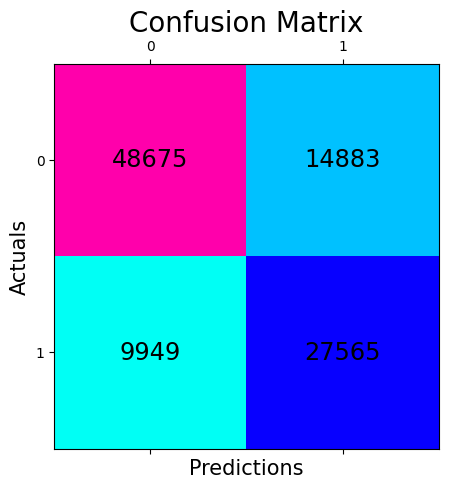

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

perf_measure(y_true,xgb_y_preds)

xgb_conf_matrix = confusion_matrix(y_test,xgb_y_preds)

color_xgb = ListedColormap(hsv_modified(np.linspace(0.5, 0.9, 256)))

fig2, ax2 = plt.subplots(figsize=(5,5))

ax2.matshow(xgb_conf_matrix, cmap=color_xgb, alpha=1)

for i in range(xgb_conf_matrix.shape[0]):
    for j in range(xgb_conf_matrix.shape[1]):
        ax2.text(x=j, y=i,s=xgb_conf_matrix[i, j], va='center', ha='center', size='xx-large')

xgb_accuracy = f"{(accuracy_score(y_true,xgb_y_preds)):.2f}"
xgb_recall = f"{(recall_score(y_true,xgb_y_preds,pos_label=1)):.2f}"
xgb_Specificity = f"{(recall_score(y_true,xgb_y_preds,pos_label=0)):.2f}"
xgb_Precision_score = f"{(precision_score(y_true,xgb_y_preds)):.2f}"
xgb_f1_score = f"{(f1_score(y_true,xgb_y_preds)):.2f}"
xgb_TP = f"{(TP / len(y_true)):.2f}"
xgb_TN = f"{(TN / len(y_true)):.2f}"
xgb_FP = f"{(FP / len(y_true)):.2f}"
xgb_FN = f"{(FN / len(y_true)):.2f}"

print("XGBoost Evaluation results: \n")
print(f"Accuracy - {xgb_accuracy}")
print(f"Recall score - {xgb_recall}")
print(f"Specificity - {xgb_Specificity}")
print(f"Precision score - {(precision_score(y_true,xgb_y_preds)):.2f}" )
print(f"f1_score - {xgb_f1_score}")
print(f"True Positive Rate  - {xgb_TP}")
print(f"True Negative Rate  - {xgb_TN}")
print(f"False Positive Rate  - {xgb_FP}")
print(f"False Negative Rate  - {xgb_FN} \n\n")

plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=20)
plt.show()


confusion matrix for visualisation of XGBoost results

# Table Summary of results

In [ ]:
row_headings = ["Accuracy", "Recall","Specificity","Precision","f1_score", "TP", "TN", "FP", "FN"]
col_headings = ["LR", "XGBoost"]
lr_result_col_values = [lr_accuracy, lr_recall, lr_Specificity, lr_Precision_score, lr_f1_score, lr_TP, lr_TN, lr_FP, lr_FN]
xgb_result_col_values = [xgb_accuracy, xgb_recall, xgb_Specificity, xgb_Precision_score, xgb_f1_score, xgb_TP, xgb_TN, xgb_FP, xgb_FN]

results_df = pd.DataFrame(np.nan,columns=col_headings, index=row_headings)
results_df["LR"] = lr_result_col_values
results_df["XGBoost"] = xgb_result_col_values
results_df

,LR,XGBoost
Accuracy,0.67,0.75
Recall,0.56,0.73
Specificity,0.74,0.77
Precision,0.56,0.65
f1_score,0.56,0.69
TP,0.21,0.27
TN,0.47,0.48
FP,0.16,0.15
FN,0.16,0.10


# Bibliography
https://analyticsindiamag.com/evaluation-metrics-in-ml-ai-for-classification-problems-wpython-code/#:~:text=In%20python%2C%20sensitivity%20and%20specificity%20can%20be%20calculated,1%20and%20the%20worst%20value%20is%200.%20F1-score

https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/

https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

https://towardsdatascience.com/6-useful-metrics-to-evaluate-binary-classification-models-55fd1fed6a20

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://www.datacamp.com/tutorial/precision-recall-curve-tutorial

https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

#############################/
##########################/
##################################/



Just out of personel curiosity , i used XGBoost model again with 2 feature sets. This one was totally unnecessary, however i was curious to find out the results.\
 XGBoost model with fs_1 and fs_2 only

Testing and training the model using XGBoost with feature sets 1 and 2 only\
Since hstacking fs_3 changes formats completely, the dataset needs to be resplit.

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split

# X, y = data[fs_1+fs_2], data[["is_duplicate"]]

# #Checking if X has any np.Nan values which can cause type-value issues
# print(X.isna().any())

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Creating DMatrices

In [ ]:
# dtrain_clf = xgb.DMatrix(X_train, y_train)
# dtest_clf = xgb.DMatrix(X_test, y_test)

specifying parameters and other necessary inputs, then performing cross validation

Cross validation is the process of finding optimal paramters by using the training , which then allows testing of the test set with optimal parameters

In [ ]:
# params = {"objective": "binary:logistic", "tree_method": "gpu_hist"}
# n = 1000
# results = xgb.cv(params, dtrain_clf,n,nfold=5,metrics=["logloss", "auc"],early_stopping_rounds=50, verbose_eval=50)

we seem to get lowest values around 420 number of rounds

testing the model using best rounds value

In [ ]:
# best_rounds = 420
# model = xgb.train(params,dtrain_clf,num_boost_round=best_rounds)
# preds = model.predict(dtest_clf)

In [ ]:
# print(y_test)
# print(preds)
# print(len(y_test))
# print(len(preds))

# Evaluation of XGBoost model with fs_1 and fs_2 only :

In [ ]:
# y_test_list = y_test['is_duplicate'].to_list()
# rounded_preds = [round(float(number)) for number in preds]
# print(y_test_list)
# print(rounded_preds)

In [ ]:
# correct_pred = 0
# for i in range(len(y_test)):
#   if y_test_list[i] == rounded_preds[i]:
#     correct_pred += 1

# accuracy = correct_pred / len(y_test)
# print(accuracy)

In [ ]:
# from sklearn.metrics import auc, log_loss, roc_auc_score
# log = log_loss(y_test,preds)
# print(log)
# print(roc_auc_score(y_test, preds,average="weighted", multi_class="ovr"))

In [ ]:
# lr_fpr, lr_tpr, lr_thresholds = roc_curve(np.array(y_true), np.array(lr_y_preds))
# print(f"False positive rate - {lr_fpr}")
# print(f"True positive rate - {lr_tpr}")
# print(f"Thresholds - {lr_thresholds}")
# print(f"Area under curve (auc) - {auc(lr_fpr,lr_tpr)}")
# print(len(lr_fpr))
# print(len(lr_tpr))

# xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(np.array(y_true), np.array(xgb_y_preds))
# print(f"False positive rate - {xgb_fpr}")
# print(f"True positive rate - {xgb_tpr}")
# print(f"Thresholds - {xgb_thresholds}")
# print(f"Area under curve (auc) - {auc(xgb_fpr,xgb_tpr)}")
# print(len(xgb_fpr))
# print(len(xgb_tpr))

In [ ]:
# def w_m_d(s1, s2, model):
#     s1 = str(s1).lower().split()
#     s2 = str(s2).lower().split()
#     stop_words = stopwords.words('english')
#     s1 = [w for w in s1 if w not in stop_words]
#     s2 = [w for w in s2 if w not in stop_words]
#     return model.wmdistance(s1, s2)

In [ ]:
# pip install numpy cython

In [ ]:
# pip install POT

In [ ]:
# from ot import emd2
# data['wmd'] = data.apply(lambda x: w_m_d(x['question1'], x['question2'], model), axis=1)
# model.init_sims(replace=True)
# data['norm_wmd'] = data.apply(lambda x: w_m_d(x['question1'], x['question2'], model), axis=1)

# fs_5 = ['wmd', 'norm_wmd']